In [1]:
%pylab inline
from functools import partial

import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Part 1

## 1.1 Linear Regression

###   1.

In [2]:
# Independent variable
x = [1, 2, 3, 4]

# Number of samples
m = len(x)

# Number of features
n = 1

# Build feature matrix
X = np.array(x)
X.shape = (m, n)

# Observations
y_train = np.array([3, 2, 0, 5])
y_train.shape = (1, m)

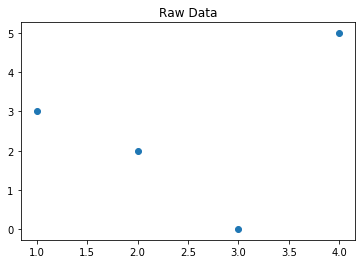

In [3]:
title("Raw Data")
scatter(X, y_train)
show()

In [4]:
def polynomial_feature_map(X, k=2):
    """
    Number of features, n = 1.
    """
    m, n = X.shape
    
    phi = np.zeros(shape=(m, k))
    
    for i, x in enumerate(X):
        mapped_feature = np.zeros(shape=(k))
        for j in range(k):
            mapped_feature[j] = x**j
        
        phi[i] = mapped_feature
    
    return np.matrix(phi)

In [5]:
def linear_regression(Phi, y_train):
    """
    Apply normal equations to find weights
    """

    a = np.matmul(Phi.T, Phi)
    b = np.matmul((Phi.T), y_train.T)

    w = np.matmul(a.I, b)
    
    return w

In [6]:
def polynomial(x, k, *w):
    """
    Apply polynomial weights derived from normal equations.
    """
    result = np.zeros_like(x)
    for i, sample in enumerate(x):
        res = 0
        for j in range(k):
            res += w[j]*sample**j
        result[i] = res

    return result

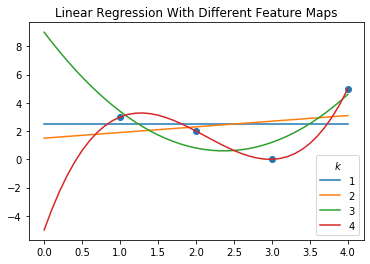

In [7]:
# Plot raw data points
scatter(X, y_train)

# Test data
x_test = np.arange(0, 4.1, 0.1)

# Plot each model
for i in range(1, 5):
    Phi = polynomial_feature_map(X, k=i)
    w = linear_regression(Phi, y_train)
    plot(x_test, polynomial(x_test, len(w), *w), label=i)
    
title('Linear Regression With Different Feature Maps')
legend(title='$k$')

In [8]:
# Weights for k=1 to k=3

for k in range(1, 4):
    Phi = polynomial_feature_map(X, k)
    w = linear_regression(Phi, y_train)
    print(f"k={k}")
    print("**********")
    print(w)

k=1
**********
[[2.5]]
k=2
**********
[[1.5]
 [0.4]]
k=3
**********
[[ 9. ]
 [-7.1]
 [ 1.5]]


In [9]:
def sse(y_test, x_test):        
    return sum((x_test-y_test)**2)

def mse(y_test, x_test):
    return sse(y_test, x_test)/len(x_test)

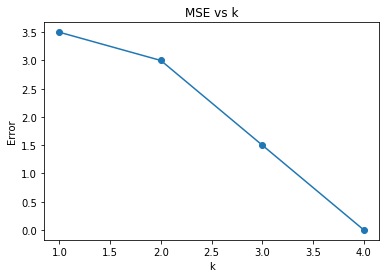

In [10]:
error_vec = []

for i in range(1, 5):
    Phi = polynomial_feature_map(X, k=i)
    w = linear_regression(Phi, y_train)
    error_vec.append(mse(y_train, polynomial(x, len(w), *w)))

title("MSE vs k")
plot(range(1, 5), error_vec, '-o')
xlabel('k')
ylabel('Error')
show()

###   2.

In [11]:
def g_sigma(x, sigma):
    epsilon = np.random.normal(scale=sigma, size=x.size)
    return np.sin(2*np.pi*x)**2 + epsilon

def exact(x):
    return np.sin(2*np.pi*x)**2

In [13]:
x_sample_30 = np.random.random(size=30)
x = np.arange(0, 1, 0.01)
g_sigma_noise = partial(g_sigma, sigma=0.07)
y_sample_30 = g_sigma_noise(x_sample_30)

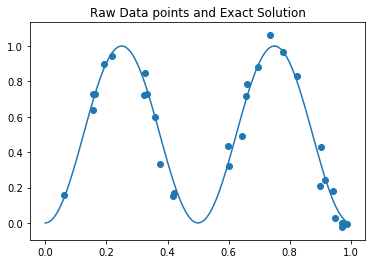

In [17]:
title("Raw Data points and Exact Solution")
scatter(x_sample_30, y_sample_30)
plot(x, exact(x))
show()

In [18]:
m = len(x_sample_30)
n = 1

X_train = np.array(x_sample_30)
X_train.shape = (m, n)
y_train = y_sample_30
y_train.shape = (1, m)

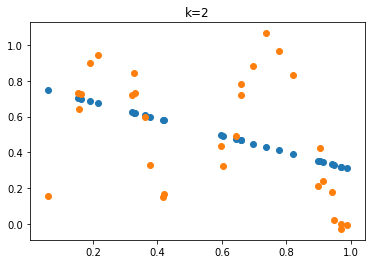

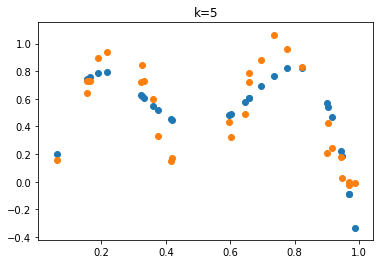

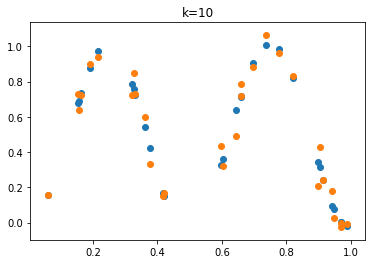

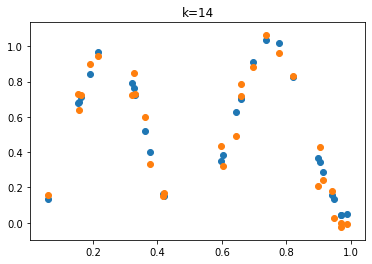

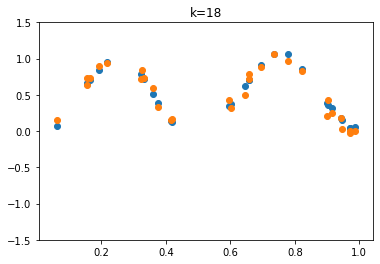

In [27]:
k_vector = [2, 5, 10, 14, 18]

for k in k_vector:
    figure()
    title(f'k={k}')
    Phi = polynomial_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)
    scatter(x_sample_30, polynomial(x_sample_30, len(w), *w), label=k)
    scatter(x_sample_30, y_sample_30)
ylim((-1.5, 1.5))
show()

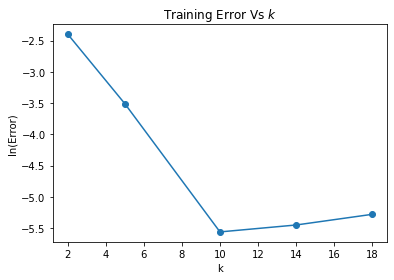

In [28]:
m = len(x_sample_30)
n = 1

X_train = np.array(x_sample_30)
X_train.shape = (m, n)
y_train = y_sample_30
y_train.shape = (1, m)

training_error_vec = []
k_vector = [2, 5, 10, 14, 18]
for k in k_vector:
    Phi = polynomial_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)
    error = mse(y_sample_30, polynomial(x_sample_30, len(w), *w))
    training_error_vec.append(np.log(error))

title("Training Error Vs $k$")
plot(k_vector, training_error_vec, '-o')
xlabel('k')
ylabel('ln(Error)')
show()

The increasing error with K is due to the ill-conditioned matrix for large K values

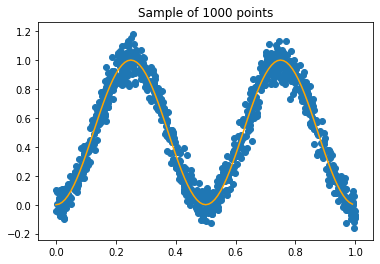

In [31]:
x_sample_1000 = np.random.random(size=1000)
g_partial = partial(g_sigma, sigma=0.07)
y_sample_1000 = g_partial(x_sample_1000)

scatter(x_sample_1000, y_sample_1000)

x = np.arange(0, 1, 0.01)
y = np.sin(2*np.pi*x)**2

plot(x, y, color='orange')
title("Sample of 1000 points")
show()

In [32]:
m = len(x_sample_1000)
n = 1

X_test = np.array(x_sample_1000)
X_test.shape = (m, n)
y_test = y_sample_1000
y_test.shape = (1, m)

In [47]:
test_error_vec = []
k_vector = arange(2,18,1)

for k in k_vector:
    Phi = polynomial_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)
    error = mse(y_test, polynomial(x_sample_1000, len(w), *w))
    test_error_vec.append(np.log(error))

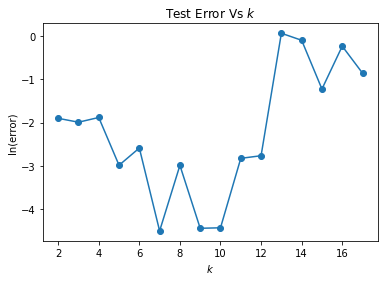

In [48]:
title("Test Error Vs $k$")
plot(k_vector, test_error_vec, '-o')
ylabel("ln(error)")
xlabel("$k$")
show()

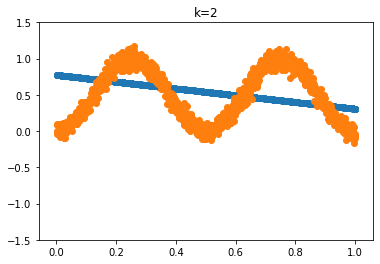

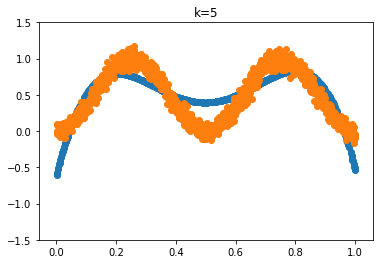

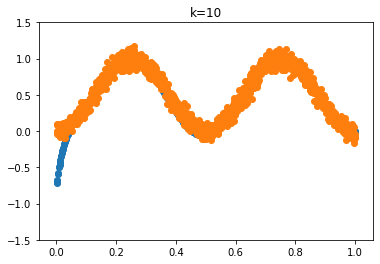

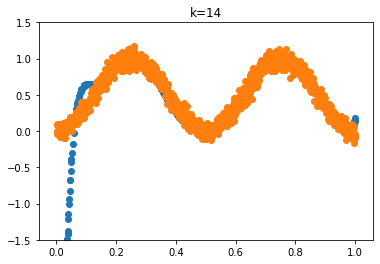

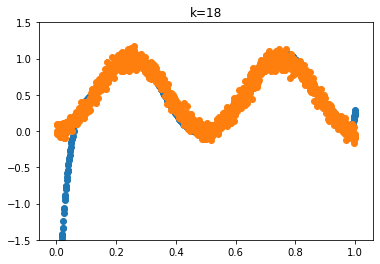

In [49]:
k_vector = [2, 5, 10, 14, 18]

for k in k_vector:
    figure()
    title(f'k={k}')
    Phi = polynomial_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)

    scatter(x_sample_1000, polynomial(x_sample_1000, len(w), *w), label=k)
    scatter(x_sample_1000, y_sample_1000)

    ylim((-1.5, 1.5))
show()

In [151]:
def error_experiment(feature_map, basis, x_sample, y_sample, k_vector):
    m = len(x_sample)
    n = 1

    X = np.array(x_sample)
    X.shape = (m, n)
    y = y_sample
    y.shape = (1, m)

    error_vec = []
    for k in k_vector:
        Phi = feature_map(X, k)
        w = linear_regression(Phi, y)
        error = mse(y_sample, basis(x_sample, len(w), *w))
        error_vec.append(error)
    
    return error_vec

def runner(feature_map, basis, x_sample, k_vector, nruns=5):
    """
    Function runner
    """
    
    results = []
    for i in range(nruns):
        y_sample = g_sigma_noise(x_sample)
        results.append(error_experiment(feature_map, basis, x_sample, y_sample, k_vector))
    return np.array(results)


In [152]:
train_results = runner(polynomial_feature_map, polynomial, x_sample_30, [2, 5, 10, 14, 18])

Text(0, 0.5, 'Mean of ln(error)')

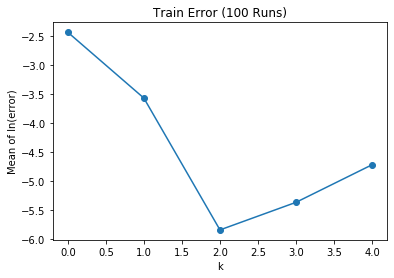

In [153]:
title("Train Error (100 Runs)")
plot(np.log(train_results.mean(axis=0)), '-o')
xlabel('k')
ylabel('Mean of ln(error)')

In [154]:
test_results = runner(polynomial_feature_map, polynomial, x_sample_1000, arange(2, 18, 1))

Text(0, 0.5, 'Mean of ln(error)')

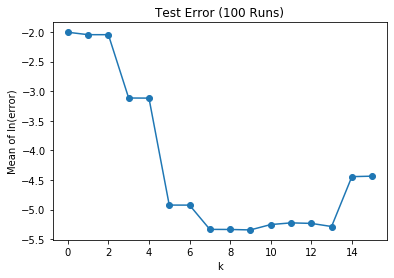

In [155]:
title("Test Error (100 Runs)")
plot(np.log(test_results.mean(axis=0)), '-o')
xlabel('k')
ylabel('Mean of ln(error)')

In [156]:
def sinusoidal_feature_map(X, k=2):
    """
    Number of features, n = 1.
    """
    m, n = X.shape
    
    phi = np.zeros(shape=(m, k))
    
    for i, x in enumerate(X):
        mapped_feature = np.zeros(shape=(k))
        for j in range(k):
            mapped_feature[j] = np.sin((j+1)*np.pi*x)
        
        phi[i] = mapped_feature
    
    return np.matrix(phi)

In [157]:
def sinusoidal(x, k, *w):
    """
    Apply sinusoidal weights derived from normal equations.
    """
    result = np.zeros_like(x)
    for i, sample in enumerate(x):
        res = 0
        for j in range(k):
            res += w[j]*np.sin((j+1)*np.pi*sample)
        result[i] = res

    return result

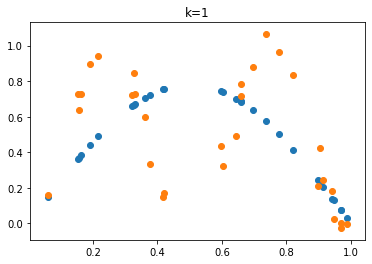

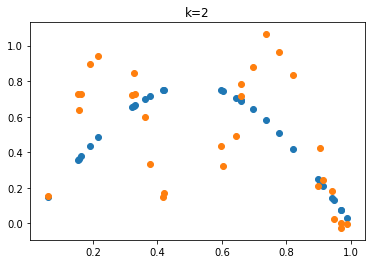

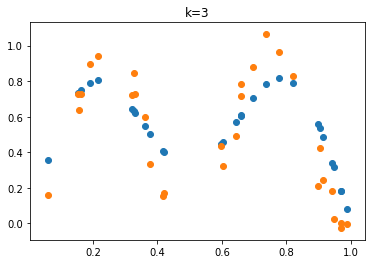

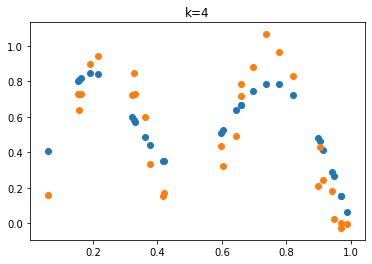

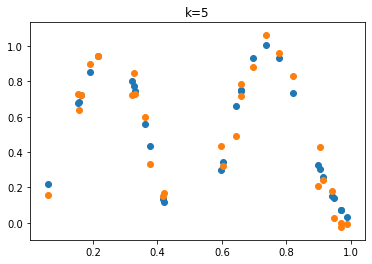

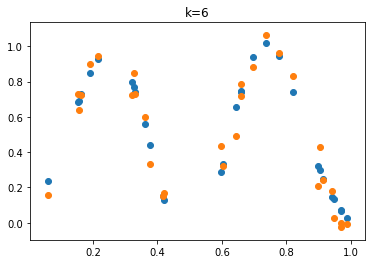

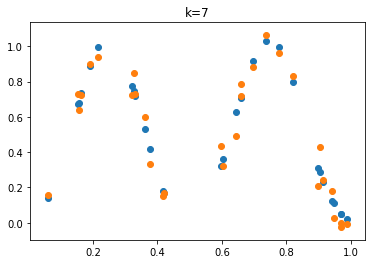

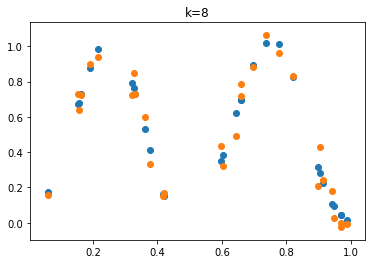

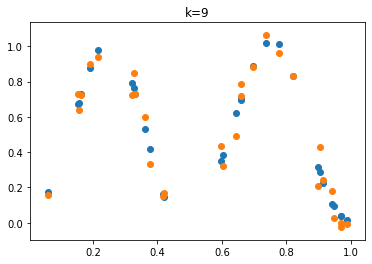

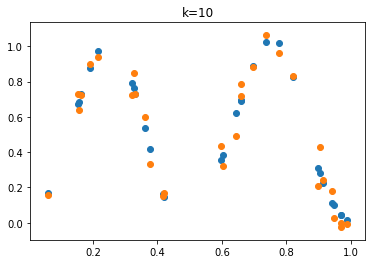

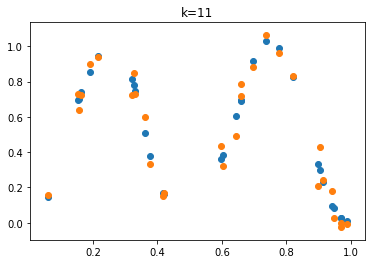

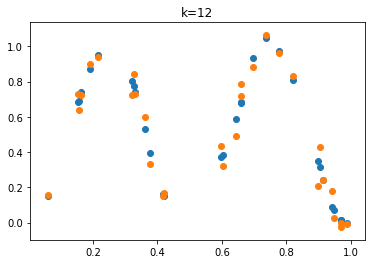

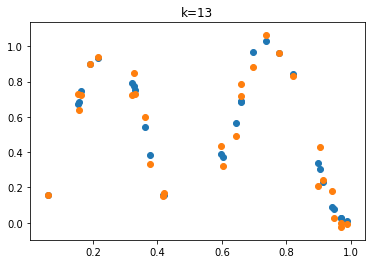

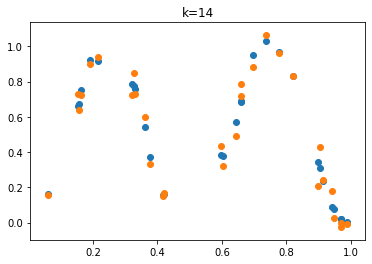

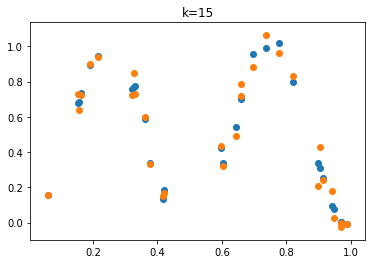

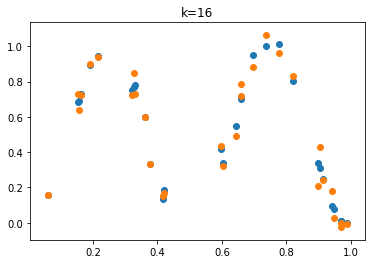

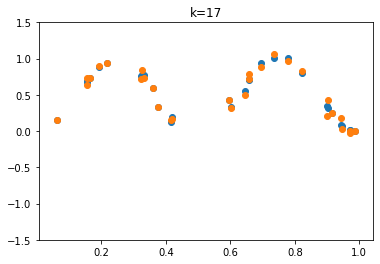

In [146]:
k_vector = arange(1, 18, 1)

for k in k_vector:
    figure()
    title(f'k={k}')
    Phi = sinusoidal_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)
    scatter(x_sample_30, sinusoidal(x_sample_30, len(w), *w), label=k)
    scatter(x_sample_30, y_sample_30)
ylim((-1.5, 1.5))
show()

In [158]:
train_results = runner(sinusoidal_feature_map, sinusoidal, x_sample_30, [2, 5, 10, 14, 18])

Text(0, 0.5, 'Mean of ln(error)')

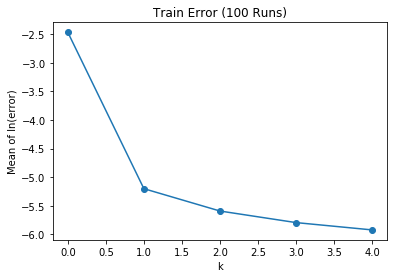

In [159]:
title("Train Error (100 Runs)")
plot(np.log(train_results.mean(axis=0)), '-o')
xlabel('k')
ylabel('Mean of ln(error)')

In [160]:
test_results = runner(sinusoidal_feature_map, sinusoidal, x_sample_1000, arange(2, 18, 1))

Text(0, 0.5, 'Mean of ln(error)')

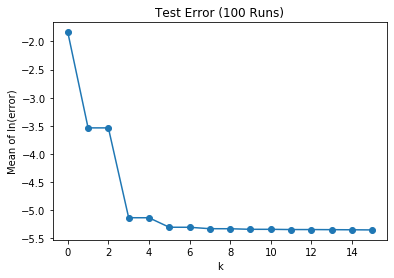

In [161]:
title("Test Error (100 Runs)")
plot(np.log(test_results.mean(axis=0)), '-o')
xlabel('k')
ylabel('Mean of ln(error)')